<div align="center"> 
    <h1> TP2 : ETUDE NUMERIQUE DE LA TRANSFORMEE QUADRATIQUE</h1>
    <h3>Réalisé par : </h3>
    <h3>YABA BILONGO Michel Davel</h3>
</div>

### Enoncé : 
Les signaux considérés ici sont du type : $ x = (x_1, x_2,..., x_n )$, n représente la dimension du signal
(on le suppose toujours une puissance de 2) et l’échantillon d’indice i est noté par $ x_i $, pour éviter les
problèmes de traitement aux bords du signal, nous considérerons que le signal est périodique (c’est
à dire : $ x_{n+1} = x_1, x_{n+2} = x_2 $ etc., ainsi que $ x_0 = x_n, x_{−1} = x_{n−1} $ etc.)
On considère les exemples suivants :
- ex1 : $ x_i = i $, 1 ≤ i ≤ n.
- ex2 : une ligne d’une image de notre choix.
- ex3 : $ x_i $ = sin(2πi), 1 ≤ i ≤ n/2 et $ x_i $ = 1/2 + sin(2πi), n/2 < i ≤ n.

In [3]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### 1. Ecriture des fonctions directe et inverse qui implémente la transformée quadratique

In [4]:
def quad_1d_direct(u):
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n) #on crée une matrice de taille n composé de 0
    v_pred = np.zeros(n)
    m = n
    while 1<m:
        p = (m//2)
        for k in range(0,p):
            #on calcule les valeurs moyennes
            w[k] = (v[2*k] + v[2*k +1])/2
            #on calcule les valeurs des erreurs aux bords
            w[k + p] = (v[2*k] - v[2*k + 1])/2
        for k in range(1, p-1):
            #on calcule les valeurs moyennes
            #w[k] = (v[2*k] + v[2*k + 1])/2
            # on calcule les valeurs prédites
            v_pred[2*k] = w[k] - (w[k-1] - w[k+1])/8
            #on calcule l'erreur
            w[k+p] = v[2*k] - v_pred[2*k]
        for k in range(0, m):
            v[k] = w[k]
        m=m//2
    return v

In [5]:
def quad_1d_inverse(u):
    n = len(u)
    v = np.copy(u)
    w = np.zeros(n) #on crée une matrice de taille n composé de 0
    v_pred = np.zeros(n)
    m = 1
    while m<n:
        p = (m//2)
        for k in range(0,m):
            #on calcule les valeurs aux bords
            w[2*k] = v[k] + v[k +m]
            w[2*k + 1] = 2*v[k] - w[2*k]
        for k in range(1, m-1):
            # on calcule les valeurs prédites
            v_pred[2*k] = v[k] - (v[k-1] - v[k+1])/8
            #on ajoute l'erreur (càd le détail) pour retrouver les valeurs initiales
            w[2*k] = v_pred[2*k] + v[k+m]
            # on calcule la valeur w[2*k  + 1] en utilisant la relation de consistence
            w[2*k + 1] = 2*v[k] - w[2*k]
        for k in range(0, 2*m):
            v[k] = w[k]
        m=2*m
    return v

### 2. Pour ces exemples, on vérifie que x = inverse(directe(x)) pour les signaux ex1, ex2, ex3.

####  - Préparation des données à tester

In [41]:
n=8
# Pour ex1
x1 = [float(i) for i in range(1, n+1)]
print("x1 = ", x1)

# Pour ex2
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('lena.png')     
gray = rgb2gray(img)   
x2 = gray[0]

#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#plt.show()
m=4
x2 = x2.tolist()    
x2 = x2[0:8]
print("x2 = ", x2)

# pour ex3
# x = sin(2πi), 1 ≤ i ≤ n/2
x3 = [np.sin(2*np.pi*i) for i in range(1, n//2+1)]
# x = 1/2 + sin(2πi), n/2 < i ≤ n
x3_ = [1/2 + np.sin(2*np.pi*i) for i in range(n//2+1, n+1)]
x3.extend(x3_)
print("x3 = ",x3)

x1 =  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
x2 =  [0.6361584496557713, 0.6361584496557713, 0.6362184530496596, 0.6316811984181404, 0.6362251163184643, 0.6137192353069783, 0.6399106062948704, 0.6299776657104491]
x3 =  [-2.4492935982947064e-16, -4.898587196589413e-16, -7.347880794884119e-16, -9.797174393178826e-16, 0.4999999999999988, 0.49999999999999856, 0.4999999999999983, 0.49999999999999806]


#### - Test des données

In [7]:
# Pour ex1
y1 = quad_1d_direct(x1)
print("y1 = ", y1)
y1_inv = quad_1d_inverse(y1)
#y1_inv = [round(i) for i in y1_inv]
print("inverse de y1 : ", y1_inv)

y1 =  [ 4.5 -2.  -1.  -1.  -0.5 -1.  -1.  -0.5]
inverse de y1 :  [1. 2. 3. 4. 5. 6. 7. 8.]


l'inverse de y est bien égale à x.

In [8]:
# Pour ex2
#x2=[round(i,8) for i in x2]
print("x2 : ",[round(i,2) for i in x2])
y2 = quad_1d_direct(x2)
print("y2 = ", y2)
y2_inv = quad_1d_inverse(y2)
y2_inv = [round(i, 2) for i in y2_inv]
print("inverse de y2 : ", y2_inv)

x2 :  [0.64, 0.64, 0.64, 0.63, 0.64, 0.61, 0.64, 0.63]
y2 =  [ 0.63250615  0.00254799  0.00110431 -0.00498598  0.          0.00366691
  0.01112865  0.00496647]
inverse de y2 :  [0.64, 0.64, 0.64, 0.63, 0.64, 0.61, 0.64, 0.63]


l'inverse de y est bien égale à x

In [9]:
# Pour ex3
#x2=[round(i,8) for i in x2]
print("x3 : ",[round(i,2) for i in x3])
y3 = quad_1d_direct(x3)
print("y3 = ", y3)
y3_inv = quad_1d_inverse(y3)
y3_inv = [round(i, 2) for i in y3_inv]
print("inverse de y3 : ", y3_inv)

x3 :  [-0.0, -0.0, -0.0, -0.0, 0.5, 0.5, 0.5, 0.5]
y3 =  [ 2.50000000e-01 -2.50000000e-01  2.44929360e-16  2.49800181e-16
  1.22464680e-16 -6.25000000e-02 -6.25000000e-02  1.11022302e-16]
inverse de y3 :  [-0.0, -0.0, -0.0, -0.0, 0.5, 0.5, 0.5, 0.5]


l'inverse de y est bien égale à x

### 3. Pour ces exemples je compte les valeurs y = directe(x) supérieures à T , pour T = 128 et T = 12. 

In [42]:
# fonction seuillage
def seuillage(u, T):
    u = np.array(u)
    return np.where(u>T, u, 0)

# fonction qui calcule le nbre de valeurs dans u supérieur à un certain seuil
def compte(u, T):
    cpt=0
    u = np.array(u) # on convertit la liste en tableau numpy
    c = np.where(u > T, cpt+1, 0) # on incrémente de 1 toutes les valeurs de u supérieur à T
    c=c.tolist() # on reconvertit à nouveau le tableau en liste
    return c.count(1) # renvoie le nbre de fois où 1 se retrouve dans la liste

In [40]:
# Pour T = 12
nb_y_ex1 = compte(y1, 12)
print("Il y a ",nb_y_ex1, " valeur(s) supérieure(s) à 12 dans ex1")
nb_y_ex2 = compte(y2, 12)
print("Il y a ",nb_y_ex2, " valeur(s) supérieure(s) à 12 dans ex2")
nb_y_ex3 = compte(y3, 12)
print("Il y a ",nb_y_ex3, " valeur(s) supérieure(s) à 12 dans ex3")

Il y a  0  valeur(s) supérieure(s) à 12 dans ex1
Il y a  0  valeur(s) supérieure(s) à 12 dans ex2
Il y a  0  valeur(s) supérieure(s) à 12 dans ex3


In [17]:
# Pour T = 128
nb_y_ex1 = compte(y1, 128)
print("Il y a ",nb_y_ex1, " valeur(s) supérieure(s) à 128 dans ex1")
nb_y_ex2 = compte(y2, 128)
print("Il y a ",nb_y_ex2, " valeur(s) supérieure(s) à 128 dans ex2")
nb_y_ex3 = compte(y3, 128)
print("Il y a ",nb_y_ex3, " valeur(s) supérieure(s) à 128 dans ex3")

Il y a  0  valeur(s) supérieure(s) à 128 dans ex1
Il y a  0  valeur(s) supérieure(s) à 128 dans ex2
Il y a  0  valeur(s) supérieure(s) à 128 dans ex3


#### - Comparaison avec les résultats obtenus avec la transformée de Haar

Les résultats obtenus avec la transformée quadratique sont identiques à ceux obtenus avec la transformée de Haar

### 4. Pour ces exemples je calcule $e_{2,T} = ||x − inverse(seuillage(directe(x), T ))||_2$ , pour T = 128 et T = 12.

In [38]:
# calcul de l'erreur par rapport à un seuil
# Pour le seuil 12
# Pour ex1
T=12
x1_T = x1 - quad_1d_inverse(seuillage(y1, T))
e_ex1_12 = np.linalg.norm((x1_T), ord=2) #calcul de la norme de x1_T
print("Erreur seuil ex1 : ",e_ex1_12)

#Pour ex2
x2_T = x2 - quad_1d_inverse(seuillage(y2, T))
e_ex2_12 = np.linalg.norm((x2_T), ord=2)
print("Erreur seuil ex2 : ",e_ex2_12)

#Pour ex3
x3_T = x3 - quad_1d_inverse(seuillage(y3, T))
e_ex3_12 = np.linalg.norm((x3_T), ord=2)
print("Erreur seuil ex3 : ",e_ex3_12)

Erreur seuil ex1 :  14.2828568570857
Erreur seuil ex2 :  1.7891286550540824
Erreur seuil ex3 :  0.9999999999999968


In [39]:
# Pour ex1
T=128
x1_T = x1 - quad_1d_inverse(seuillage(y1, 128))
e_ex1_12 = np.linalg.norm((x1_T), ord=2) #calcul de la norme de x1_T
print("Erreur seuil ex1 : ",e_ex1_12)

#Pour ex2
x2_T = x2 - quad_1d_inverse(seuillage(y2, T))
e_ex2_12 = np.linalg.norm((x2_T), ord=2)
print("Erreur seuil ex2 : ",e_ex2_12)

# Pour ex3
x3_T = x3 - quad_1d_inverse(seuillage(y3, T))
e_ex3_12 = np.linalg.norm((x3_T), ord=2)
print("Erreur seuil ex3 : ",e_ex3_12)

Erreur seuil ex1 :  14.2828568570857
Erreur seuil ex2 :  1.7891286550540824
Erreur seuil ex3 :  0.9999999999999968


### - Comparaison avec les résultats obtenus en transformée de Haar

En transformée de Haar, l'erreur par rapport à T=12 et T=128  pour ex1, ex2 et ex3 correspond à :
- Erreur seuil ex1 :  14.2828568570857
- Erreur seuil ex2 :  1.7891286605275318
- Erreur seuil ex3 :  1.0

En transformée quadratique, l'erreur par rapport à T=12 et T=128  pour ex1, ex2 et ex3 correspond à :
- Erreur seuil ex1 :  14.2828568570857
- Erreur seuil ex2 :  1.7891286550540824
- Erreur seuil ex3 :  0.9999999999999968

On peut en déduire que :
- Pour ex1, les erreurs dans les 2 transformées sont identiques
- Pour ex2, l'erreur dans la transformée de Haar est légèrement plus grande par rapport à celle obtenue en transformée quadratique
- Pour ex3, l'erreur dans la transformée de Haar est légèrement plus grande par rapport à celle obtenue en transformée quadratique

### 5. Etude numériquement de la qualité de la reconstruction par rapport aux seuils utilisés. Faire le graphe de l’érreur en fonction du seuil.

In [43]:
# fonction qui renvoie les erreurs en fonction des seuils
def getErreur(seuil, x, y):
    e = []
    for i in seuil:
        x_T = x - quad_1d_inverse(seuillage(y, i))
        e_T = np.linalg.norm((x_T), ord=2)
        #print(np.max(np.array(e_T)))
        e.append(e_T)
    return e

# fonction d'affichage du graphe
def affichage(seuil, erreur, couleur):
    plt.plot(seuil, erreur, color=couleur)
    plt.xlabel('seuil')
    plt.ylabel('erreur')
    plt.title('Graphe des erreurs en fonction du seuil')
    plt.legend

In [44]:
# Je choisis les seuils de -129 à 129
T = [t for t in range(-129, 129)]

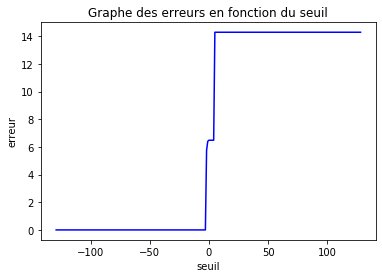

In [36]:
# Pour ex1
e = getErreur(T, x1, y1)
affichage(T, e, 'b')

Avec le signal ex1, les erreurs varient de 0 à environ 14.
Les erreurs sont moins importantes (<2) quand on choisit des seuils inférieurs à 0 (pour être plus précis à partir de -0.5 jusqu'à -129). Au delà de cet intervalle, l'erreur augmente d'abord d'environ 7 puis de plus de 14.

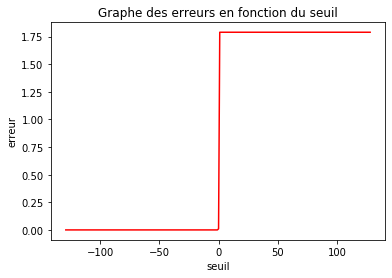

In [26]:
# Pour ex2
e = getErreur(T, x2, y2)
affichage(T, e, 'r')

Avec le signal ex2, les erreurs prennent des valeurs allant de 0 à environ 1.75.
Les erreurs sont moins importantes (<2) quand on choisit des seuils inférieurs ou égale à 0. Cette courbe augmente quand on a des valeurs seuils au dessus de 0.

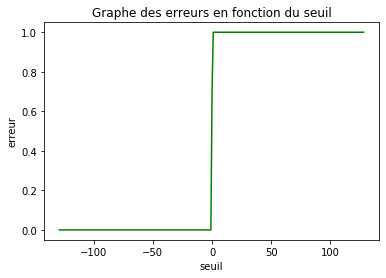

In [27]:
# Pour ex3
e = getErreur(T, x3, y3)
affichage(T, e, 'g')

Avec le signal ex3, les erreurs ne dépasse pas 1.
Pour des valeurs seuils allant de 0 à -129, on a une faible proportion d'erreur. Mais au delà, cette proportion d'erreur passe à 1.

### Conclusion

On peut en déduire que ex1 a plus d'erreurs que ex2 qui à son tour a plus d'erreur que ex3. D'une manière générale, la proportion d'erreur augmente pour des valeurs du seuil au delà de 0. A l'opposé, pour des valeurs du seuil inférieure à 0, la proportion d'erreurs reste relativement faible.

### Comparaison avec la transformée de Haar

En comparons les graphes d'erreurs en fonction du seuil dans les 2 transformées, on constate que :
- Dans la transformée de Haar 
    - Pour ex1, les erreurs varient entre 0 et 14..
    - Pour ex2, les erreurs varient entre 0 et 1.75
    - Pour ex3, les erreurs varient entre 0 et 1
- Dans la transformée quadratique
    - Pour ex1, les erreurs varient entre 0 et environ 14
    - Pour ex2, les erreurs varient entre 0 et environ 1.75
    - Pour ex3, les erreurs varient entre 0 et 1
    
Les courbes ne nous donnent pas assez d'informations qui nous permettent de distinguer clairement les 2 transformées quand le seuil est inférieur à 0. Mais les différences se font voir quand on a un seuil plus grand. En effet, au delà d'un seuil de 0, la courbe d'erreur est légèrement plus grande en utilisant la transformée de Haar sur les signaux ex2 et ex3. On obtient par contre les mêmes résultats en utilisant les 2 transformées sur ex1. 

On peut en déduire qu'on peut utiliser les 2 transformées pour  les signaux à valeurs discrètes. Par contre, pour les signaux des images et des valeurs périodiques, il est préférable d'utiliser la transformée quadratique car on a légèrement moins d'erreur de prédiction quoique cette différence soit minime.